# Project: Investigate a Medical Appointment No Show Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this data set, we will analyze the information of 100 thousand medical appointments
 in Brazil and evaluate the rate of avoidance of consultations. A number of characteristics about the patient are included in each row.
 
<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>The 'No-Show' column is encoded as follows: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>

### Questions
Some initial questions were raised, namely:
<li> Does the SMS service guarantee a lower non-attendance rate? </li>
<li> Is there a relationship between disease and the no-show rate?</li>
<li> Is there a relationship between the proportion of no-shows and the neighborhood? </li>

During the study the fact that the person does not appear will be treated as our dependent variable and the other fields, such as: Hypertension, Diabetes, Alcoholism,HandCap,Neighbourhood and SMS Received will be the independent variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data will be loaded and then verified. In the next step, the data underwent adjustments and cleaning in the set in order to eliminate inconsistencies and then start the analysis step.

### General Properties

In this step the data set will be loaded and then some operations will be carried out to evaluate its structure and the types of variables that we will be working on.

In [2]:
no_show_df = pd.read_csv('noshowappointments.csv')

In [3]:
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
no_show_df.shape

(110527, 14)

In [5]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [6]:
no_show_df.columns = [x.lower() for x in no_show_df.columns]
no_show_df.rename(columns={'no-show': 'no_show'},inplace=True)

In [7]:
no_show_df.duplicated().sum()

0

In [8]:
no_show_df.isna().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

In [9]:
no_show_df['no_show'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [10]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 10.1+ MB


At this point we can observe that the data types referring to the date were adjusted correctly and the column names were placed in the low box. In this way we can go to the next step that is the cleaning of the data. It is important to note that there is no null data in the pool.

In [11]:
no_show_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### Data Cleaning (Replace this with more specific notes!)

First, an analysis of how the data behavior is to verify possible inconsistent values

In [12]:
no_show_df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Through the description of the data, it was possible to observe that the lower age has the value -1 we will evaluate what the data are and whether they can be removed from the set. In addition, handcap data is ranging from 0 to 4, this distribution will be evaluated for more column information.

In [13]:
no_show_df.loc[no_show_df.age<0,:]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,0


In [14]:
no_show_df.drop(no_show_df.loc[no_show_df.age<0,:].index,inplace=True)

In [15]:
no_show_df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

Handcap data has small amounts when greater than zero, so cases with or without handcap will be addressed. For this all data values in which they have handcap will be treated as 1 and 0 for values that do not have handcap

In [16]:
no_show_df.loc[(no_show_df.handcap > 0),'handcap'] = 1

In [17]:
no_show_df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data type of the date column is assigned to object and an evaluation of the data will be made to verify that the data is of type String and then will be modified to DateTime which will help the processing of this information.

In [18]:
if (type(no_show_df['scheduledday'][0])==str and type(no_show_df['appointmentday'][0])==str):
    no_show_df['scheduledday'] = pd.to_datetime(no_show_df['scheduledday'],format='%Y-%m-%dT%H:%M:%SZ')
    no_show_df['appointmentday'] = pd.to_datetime(no_show_df['appointmentday'],format='%Y-%m-%dT%H:%M:%SZ')

In [19]:
no_show_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


At this point we can write clean data to a new file

In [20]:
no_show_df.to_csv('noshowappointment_clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

In [21]:
clean_df = pd.read_csv('noshowappointment_clean.csv')

In [22]:
def columnComparison(df,column):
        sns.set_theme()
        comp_df = pd.DataFrame()
        comp_df['no_show'] = (clean_df[clean_df.no_show == 1][column].value_counts())
        comp_df['show_up'] = (clean_df[clean_df.no_show == 0][column].value_counts())
        comp_df['sample_size'] = (comp_df.no_show + comp_df.show_up)
        comp_df['no_show_prop'] = (comp_df.no_show/(comp_df.no_show+comp_df.show_up))
        comp_df['name'] = column
        no_show_prop = comp_df.no_show.sum()/comp_df.sample_size.sum()
        return (comp_df,no_show_prop)
comp_sms_df,prop_no_show = columnComparison(clean_df,'sms_received')

In [23]:
def graphPlot(df,noshowprop,w,h):
    plt.figure(figsize=(w,h))
    bins = df.index
    height_bar=0.4
    bars = plt.barh(bins,df.no_show_prop,align='center',color='orange',height=height_bar);
    plt.xlabel('No-show rates')
    plt.ylabel(df.name.unique()[0])
    plt.title('No-show rates by ' + df.name.unique()[0])
    plt.axvline(noshowprop,color='red')
    plt.legend(['Average No-show'])
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width * 1.02, bar.get_y() + (height_bar / 2.), round(width, 3),
            ha = 'left', va = 'center'
            )
    plt.yticks(bins)

### Does the SMS service guarantee a lower non-attendance rate?

To answer the question of this session, we need to collect the data regarding the proportions of people who receive messages and do not receive messages and then compare with the no-show rates. For this, the comparison function will be used and then we will plot the data obtained based on the chart function.

In [24]:
comp_sms_df, prop_sms_noshow = columnComparison(clean_df,'sms_received')
comp_sms_df

,no_show,show_up,sample_size,no_show_prop,name
0,12535,62509,75044,0.167035,sms_received
1,9784,25698,35482,0.275745,sms_received


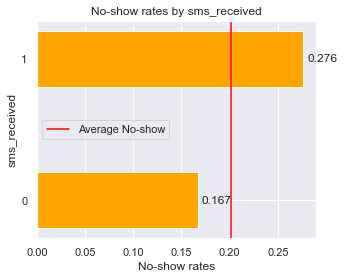

In [25]:
graphPlot(comp_sms_df,prop_sms_noshow,5,4)

Based on the previous result, we can note that the group that receives messages is having a higher no-show ratio than the group that does not receive messages. In addition, the no-show rate when receiving a message is higher than the average no-show of the whole set for this range. This indicates that the messaging service is not having an efficiency in reducing no-shows from appointments.

### Is there a relationship between disease and the no-show rate?

In [26]:
comp_h_df, prop_h_noshow = columnComparison(clean_df,'hipertension')
comp_d_df, prop_d_noshow = columnComparison(clean_df,'diabetes')
comp_a_df, prop_a_noshow = columnComparison(clean_df,'alcoholism')
comp_a_df

,no_show,show_up,sample_size,no_show_prop,name
0,21642,85524,107166,0.201948,alcoholism
1,677,2683,3360,0.201488,alcoholism


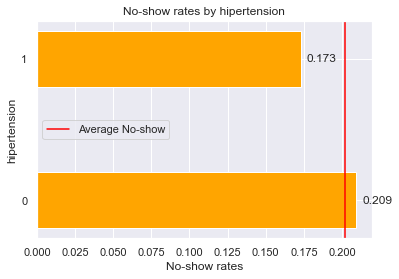

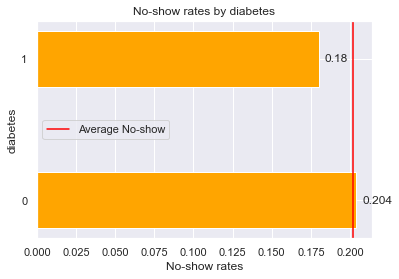

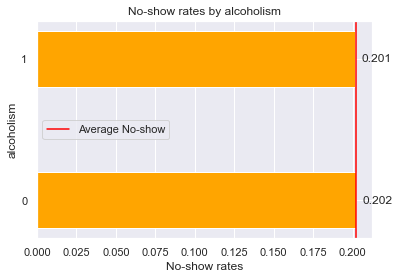

In [27]:
graphPlot(comp_h_df,prop_h_noshow,6,4);
graphPlot(comp_d_df,prop_d_noshow,6,4);
graphPlot(comp_a_df,prop_a_noshow,6,4);

It is observed from the results that people with Hypertension and Diabetes have lower rates of no-show than those who do not have the diseases. In addition, the index is also lower than the average number of people who do not attend the commitments. As for the variable of alcoholism disease, we cannot say that there is a difference, because the values of people who attend and those who do not attend are equal.

### Is there a relationship between the proportion of no-shows and the neighborhood?

We'll get the comparison for the neighborhood data, and then we'll perform the evaluation step of distributing the data through a bar chart.

In [28]:
# Threshold of values with a show greater than 100
comp_n_df, prop_n_noshow = columnComparison(clean_df,'neighbourhood')
comp_n_df.fillna(0,inplace=True)
comp_n_df.describe()

,no_show,show_up,sample_size,no_show_prop
count,80.000000,80.000000,80.000000,80.000000
mean,278.987500,1102.575000,1381.537500,0.195496
std,278.000751,1096.272116,1369.181544,0.038493
min,1.000000,0.000000,0.000000,0.000000
25%,75.000000,324.000000,420.500000,0.179868
50%,184.500000,709.500000,854.500000,0.197307
75%,428.250000,1605.000000,2067.000000,0.216731
max,1465.000000,6252.000000,7717.000000,0.289185


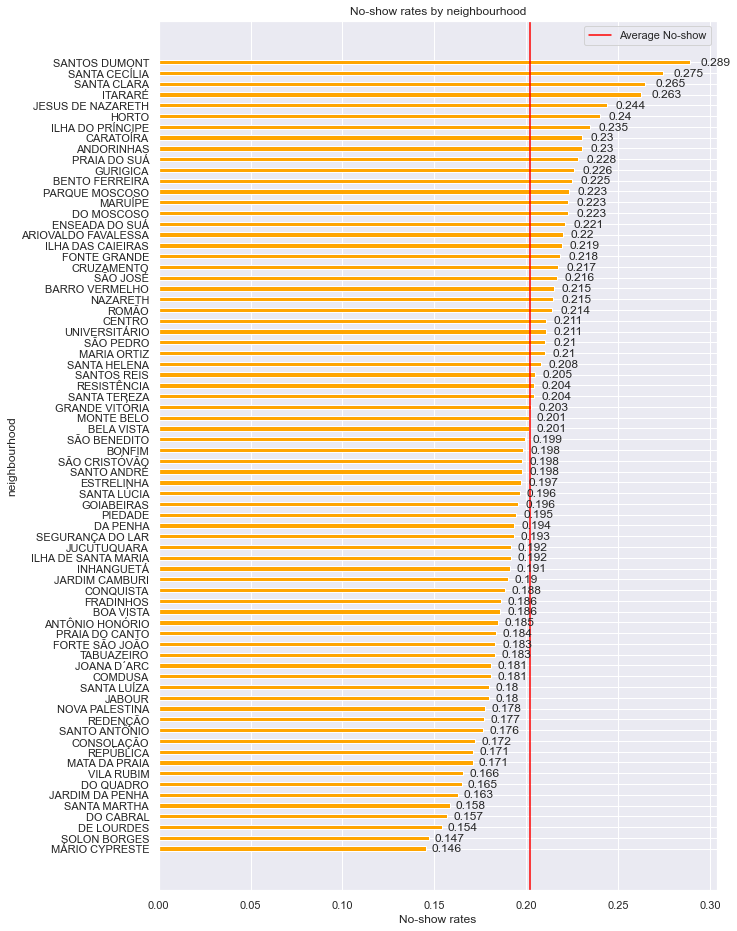

In [29]:
neigh_df = comp_n_df[comp_n_df.sample_size>100]
graphPlot(neigh_df.sort_values('no_show_prop'),prop_n_noshow,10,16);

Text(0.5, 1.0, 'Frequencies fo neighbourhood vs no-show propotion bins')

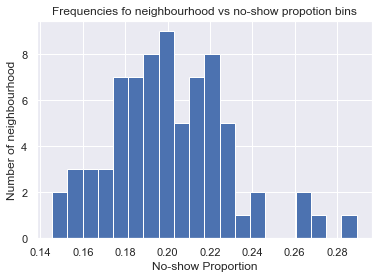

In [30]:
neigh_df.no_show_prop.hist(bins=20);
plt.xlabel('No-show Proportion')
plt.ylabel('Number of neighbourhood')
plt.title('Frequencies fo neighbourhood vs no-show propotion bins')

In [31]:
neigh_df['no_show_prop'].describe()

count    74.000000
mean      0.201194
std       0.028210
min       0.145553
25%       0.183004
50%       0.198027
75%       0.218220
max       0.289185
Name: no_show_prop, dtype: float64

For the analysis, 74 records containing a sample size greater than 100 were used. This threshold was adopted to show better behavior of the no-show proportion data, since showing minors may be inaccurate to obtain conclusions.
The plots of proportions and their histogram were plotted, through these results we can say that 50% of the data correspond to cases where the neighborhoods did not appear in the appointments. Therefore, patients in these neighborhoods are more likely to miss their commitments than the lower half of the sample. By describing the data we can conclude that the neighborhood affects the non-attendance of appointments. Patients from 'Santos Dumont, had a proportion of 0.289 approximately 9 % more than the average of people who did not attend, which leads to believe that this is a neighborhood that has patients who do not arrive at their appointments. On the other hand, 'Mario Cypreste' patients had a ratio of 0.146, 5.4% less than the average no-show, which indicates that this neighborhood has more people fulfilling their commitments.

<a id='conclusions'></a>
## Conclusions

In this work, we saw that the analysis made on the data of no-show in medical appointments can have specific relationships between several factors such as diseases, neighborhood and programs that try to mitigate absences. 

We observed that the non-attendance rate is lower for people who have diseases such as diabetes and hypertension than people who do not. We have also seen that depending on the location there is a greater chance that the person will not attend while the opposite is also valid. 

Finally, one of the most curious results is that, according to the data provided, the SMS warning program is not as effective as it appears to be. Our analysis shows that the proportion of people who do not attend appointments and who receive messages is higher than those who do not attend and receive no messages. These conclusions are fundamental for other approaches to the data, we can apply tests that make it possible to infer statistics about a population of people who make appointments and then say whether the sample statistics are significant or not.

## References
* https://www.tableau.com/learn/articles/what-is-data-cleaning
* https://stackoverflow.com/questions/19726029/how-can-i-make-pandas-dataframe-column-headers-all-lowercase
* https://www.kaggle.com/joniarroba/noshowappointments
* https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
* https://www.kaggle.com/yousuf28/medical-appointment-no-show-in-python/notebook
* https://github.com/stefan-cornelissen/Investigate-a-Dataset---No-Shows-Medical-Appointments-Brazil-Udacity-Project